# Question 4
## Miltiades Vasiliades 2944

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
from datetime import datetime

import numpy as np 
import scipy as sc 
import sklearn
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library
import seaborn as sns #A more fancy plotting library

#For presenting plots inline
%matplotlib inline 

In [2]:
def ContinentTtests():
    for i in range(gdf.continent.size-1):
        continent1 = gdf.continent[i]
        DR1 = countryGroups.get_group(continent1).death_rate
        CpM1 = countryGroups.get_group(continent1).total_cases_per_million
        DpM1 = countryGroups.get_group(continent1).total_deaths_per_million
        for j in range(i+1 ,gdf.continent.size):
            continent2 = gdf.continent[j]
            DR2 = countryGroups.get_group(continent2).death_rate
            CpM2 = countryGroups.get_group(continent2).total_cases_per_million
            DpM2 = countryGroups.get_group(continent2).total_deaths_per_million

            print('T Test for ', continent1, 'and',continent2, 'between','Death Rates' ,stats.ttest_ind(DR1,DR2,equal_var = False,nan_policy='omit'))
            print('T Test for ', continent1, 'and',continent2, 'between','Deaths Per Million' ,stats.ttest_ind(CpM1,CpM2,equal_var = False,nan_policy='omit'))
            print('T Test for ', continent1, 'and',continent2, 'between','Cases Per Million',stats.ttest_ind(DpM1,DpM2,equal_var = False,nan_policy='omit'))



In [3]:
def print9ScatterPlots(hue):
    #plt.figure();
    fig, ax = plt.subplots(3, 3,figsize=(20,20))
    sns.scatterplot(x='total_cases_per_million',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[0][0]);
    sns.scatterplot(x='total_cases_per_million',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[0][1]);
    sns.scatterplot(x='total_cases_per_million',y='population_density',hue=hue, data = filteredDate,ax = ax[0][2]);

    sns.scatterplot(x='total_deaths_per_million',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[1][0]);
    sns.scatterplot(x='total_deaths_per_million',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[1][1]);
    sns.scatterplot(x='total_deaths_per_million',y='population_density',hue=hue, data = filteredDate,ax = ax[1][2]);

    sns.scatterplot(x='death_rate',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[2][0]);
    sns.scatterplot(x='death_rate',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[2][1]);
    sns.scatterplot(x='death_rate',y='population_density',hue=hue, data = filteredDate,ax = ax[2][2]);
    plt.tight_layout()
    

In [4]:
#  p-values
def printPearsonr():
    print("Pearon method pearson corellation and p values respectively between total cases per Million gdp per capita, hospital beds per capita and population density respectively")
    print(stats.pearsonr((filteredDate.dropna()).total_cases_per_million, (filteredDate.dropna()).gdp_per_capita))
    print(stats.pearsonr((filteredDate.dropna()).total_cases_per_million, (filteredDate.dropna()).hospital_beds_per_thousand))
    print(stats.pearsonr((filteredDate.dropna()).total_cases_per_million, (filteredDate.dropna()).population_density))
    print("Pearon method pearson corellation and p values respectively between total deaths per Million  gdp per capita, hospital beds per capita and population density respectively")
    print(stats.pearsonr((filteredDate.dropna()).total_deaths_per_million, (filteredDate.dropna()).gdp_per_capita))
    print(stats.pearsonr((filteredDate.dropna()).total_deaths_per_million, (filteredDate.dropna()).hospital_beds_per_thousand))
    print(stats.pearsonr((filteredDate.dropna()).total_deaths_per_million, (filteredDate.dropna()).population_density))
    print("Pearon method pearson corellation and p values respectively between deathrate gdp per capita, hospital beds per capita and population density respectively")
    print(stats.pearsonr((filteredDate.dropna()).death_rate, (filteredDate.dropna()).gdp_per_capita))
    print(stats.pearsonr((filteredDate.dropna()).death_rate, (filteredDate.dropna()).hospital_beds_per_thousand))
    print(stats.pearsonr((filteredDate.dropna()).death_rate, (filteredDate.dropna()).population_density))



In [5]:
def printCorrelationHeatmap():
    correlation=(filteredDate.dropna()[["total_cases_per_million","total_deaths_per_million","death_rate","gdp_per_capita","hospital_beds_per_thousand","population_density"]]).corr()
    display(correlation)
    _=sns.heatmap(correlation,annot=True,square=False,)


In [6]:


def printThreeBarPlots():
    plt.figure();
    fig, ax = plt.subplots(1, 3,figsize=(30,5))
    sns.barplot(x='continent',y='total_cases_per_million', data = filteredDate,capsize=.2,ax=ax[0]);
    sns.barplot(x='continent',y='total_deaths_per_million', data = filteredDate,capsize=.2,ax=ax[1]);
    sns.barplot(x='continent',y='death_rate', data = filteredDate,capsize=.2,ax = ax[2]);
    plt.tight_layout()
    



In [7]:
def print9ScatterPlotsPopLoglog(hue):
    #plt.figure();
    fig, ax = plt.subplots(3, 3,figsize=(20,20))
    sns.scatterplot(x='total_cases_per_million',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[0][0]);
    sns.scatterplot(x='total_cases_per_million',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[0][1]);
    sns.scatterplot(x='total_cases_per_million',y='population_density',hue=hue, data = filteredDate,ax = ax[0][2]).loglog();

    sns.scatterplot(x='total_deaths_per_million',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[1][0]);
    sns.scatterplot(x='total_deaths_per_million',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[1][1]);
    sns.scatterplot(x='total_deaths_per_million',y='population_density',hue=hue, data = filteredDate,ax = ax[1][2]).loglog();

    sns.scatterplot(x='death_rate',y='gdp_per_capita', hue=hue, data = filteredDate,ax=ax[2][0]);
    sns.scatterplot(x='death_rate',y='hospital_beds_per_thousand',hue=hue, data = filteredDate,ax=ax[2][1]);
    sns.scatterplot(x='death_rate',y='population_density',hue=hue, data = filteredDate,ax = ax[2][2]).loglog();
    plt.tight_layout()

In [8]:
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
#df.set_index(['date'])
df.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          NaN        0.0   
1      AFG      Asia  Afghanistan 2020-01-01          NaN        0.0   
2      AFG      Asia  Afghanistan 2020-01-02          NaN        0.0   
3      AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
4      AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 50 columns]

Let's Start by selecting date to be the first of November.
We then drop all other columns from the dataframe but the ones we are interested in 
Death Rate is computed and added as a column

In [9]:
datemask = df['date']=='2020-11-01'
df=df.loc[:,['iso_code','location','continent','date','total_cases_per_million','total_deaths_per_million','total_cases','total_deaths','gdp_per_capita','hospital_beds_per_thousand','population_density']]
filteredDate=df.loc[datemask]
filteredDate[['total_cases_per_million','total_deaths_per_million']]
filteredDate['death_rate'] = (filteredDate.total_deaths / filteredDate.total_cases)
#filteredDate=filteredDate.loc[:,['iso_code','continent','date','total_cases_per_million','total_deaths_per_million','death_rate','gdp_per_capita','hospital_beds_per_thousand','population_density']]
filteredDate.head()
Dictionary={
    "by_gdp":['total_deaths_per_million','total_cases_per_million','death_rate','gdp_per_capita'],
    "by_hospital_beds":['total_deaths_per_million','total_cases_per_million','death_rate','hospital_beds_per_thousand'],
    "by_pop_density":['total_deaths_per_million','total_cases_per_million','death_rate','population_density']

}
filteredDate.head()

iso_code     location continent       date  total_cases_per_million  \
306       AFG  Afghanistan      Asia 2020-11-01                 1066.087   
568       ALB      Albania    Europe 2020-11-01                 7253.805   
899       DZA      Algeria    Africa 2020-11-01                 1321.337   
1162      AND      Andorra    Europe 2020-11-01                61554.391   
1411      AGO       Angola    Africa 2020-11-01                  321.241   

      total_deaths_per_million  total_cases  total_deaths  gdp_per_capita  \
306                     39.457      41501.0        1536.0        1803.987   
568                    176.871      20875.0         509.0       11803.431   
899                     44.788      57942.0        1964.0       13913.839   
1162                   970.685       4756.0          75.0             NaN   
1411                     8.489      10558.0         279.0        5819.495   

      hospital_beds_per_thousand  population_density  death_rate  
306                         0.50              54.422    0.037011  
568                         2.89             104.871    0.024383  
899                         1.90              17.348    0.033896  
1162                         NaN             163.755    0.015770  
1411                         NaN              23.890    0.026425

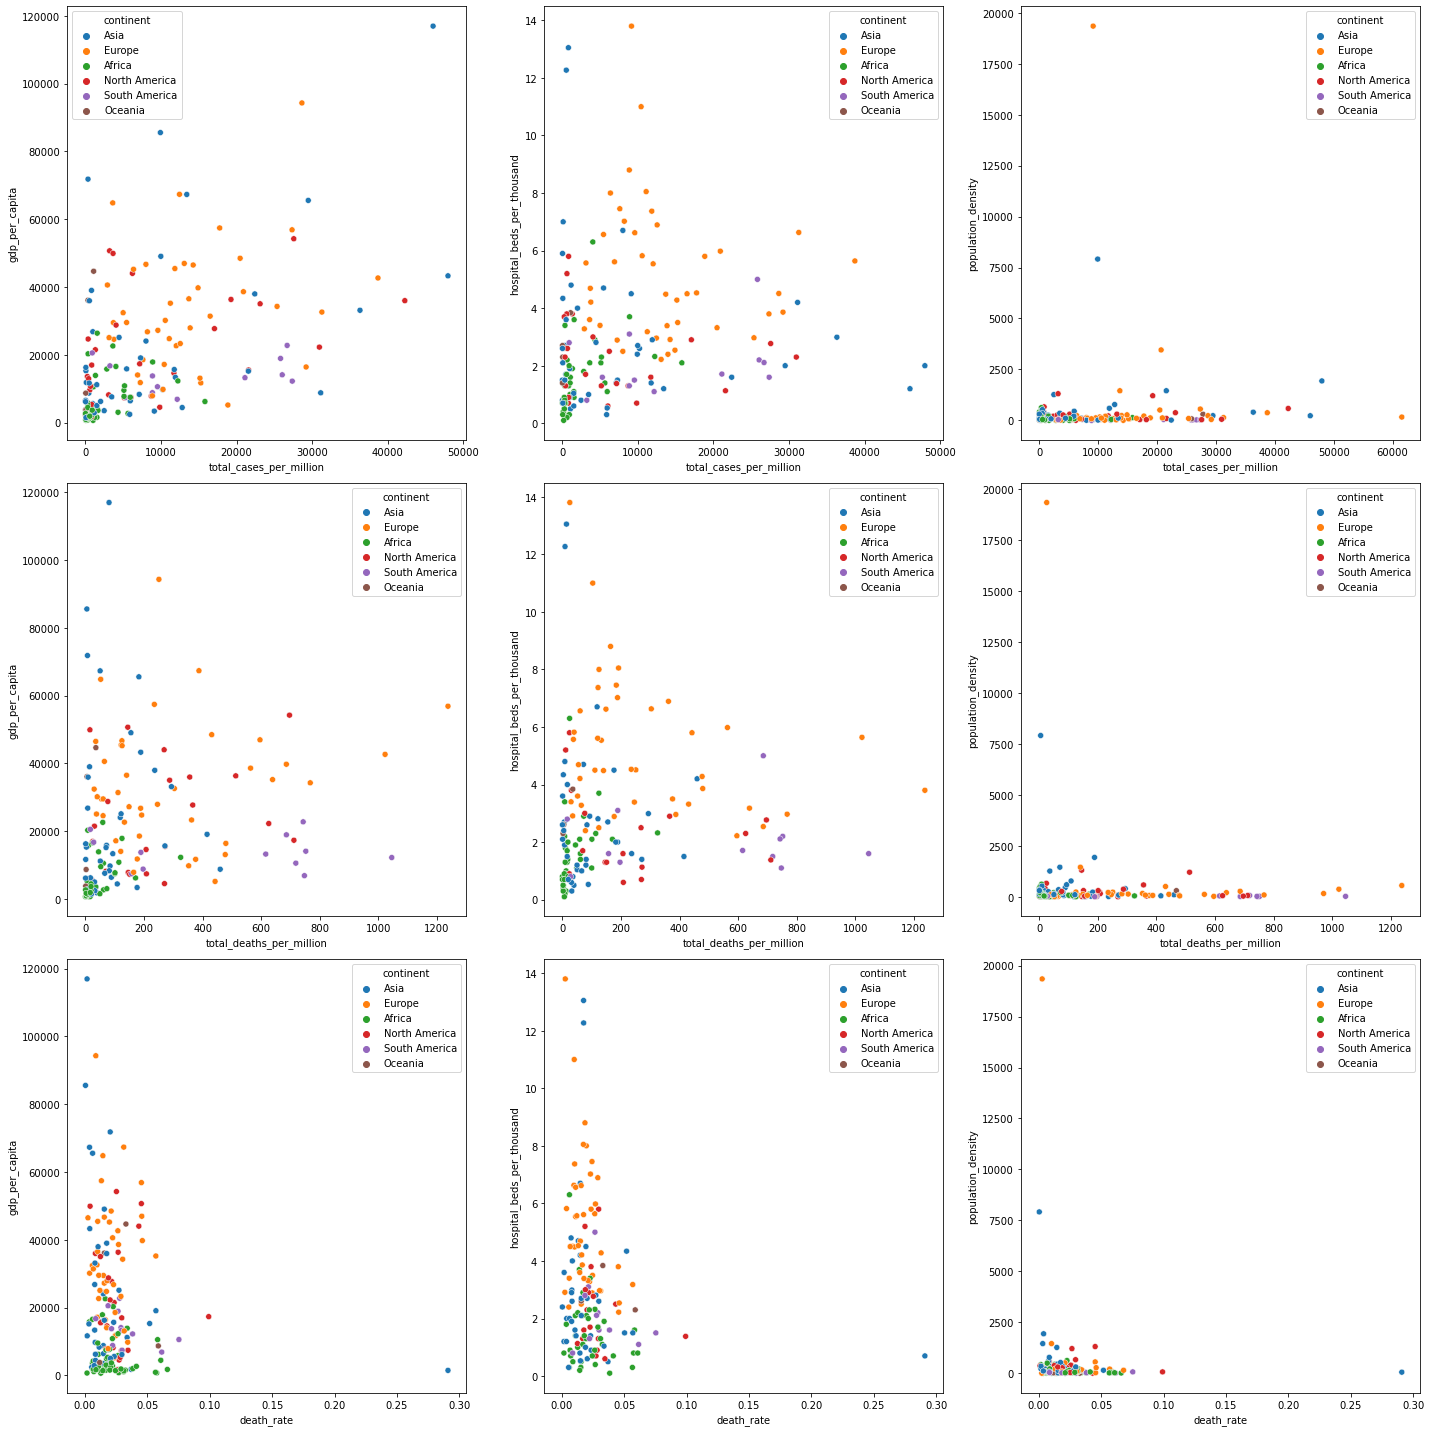

In [10]:
#sns.relplot(x="total_cases_per_million",y="gdp_per_capita",hue="continent",data=filteredDate)
'vars=["total_cases_per_million","total_deaths_per_million","gdp_per_capita","hospital_beds_per_thousand","population_density"]'
#sns.pairplot(filteredDate,hue="continent",kind='scatter',corner=True,dropna=True,diag_kind='kde')
#sns.pairplot(filteredDate,hue="continent",x_vars=['total_cases_per_million','total_deaths_per_million','death_rate'],y_vars=["gdp_per_capita","hospital_beds_per_thousand","population_density"],kind='scatter',corner=False,dropna=False)

print9ScatterPlots('continent')

It's difficult to make any clear observations due to the dots being too many generally speaking countries with a higher gdp per capita seem to enjoy a lower death rate. We have to move to the correlation analysis to shed some more light into the data.

In [11]:
#print9ScatterPlots()

total_cases_per_million  total_deaths_per_million  \
total_cases_per_million                    1.000000                  0.676525   
total_deaths_per_million                   0.676525                  1.000000   
death_rate                                -0.128359                  0.189503   
gdp_per_capita                             0.497955                  0.215800   
hospital_beds_per_thousand                 0.151985                  0.079956   
population_density                         0.084028                 -0.064811   

                            death_rate  gdp_per_capita  \
total_cases_per_million      -0.128359        0.497955   
total_deaths_per_million      0.189503        0.215800   
death_rate                    1.000000       -0.166997   
gdp_per_capita               -0.166997        1.000000   
hospital_beds_per_thousand   -0.170699        0.302947   
population_density           -0.110891        0.285043   

                            hospital_beds_per_thousand  population_density  
total_cases_per_million                       0.151985            0.084028  
total_deaths_per_million                      0.079956           -0.064811  
death_rate                                   -0.170699           -0.110891  
gdp_per_capita                                0.302947            0.285043  
hospital_beds_per_thousand                    1.000000           -0.000645  
population_density                           -0.000645            1.000000

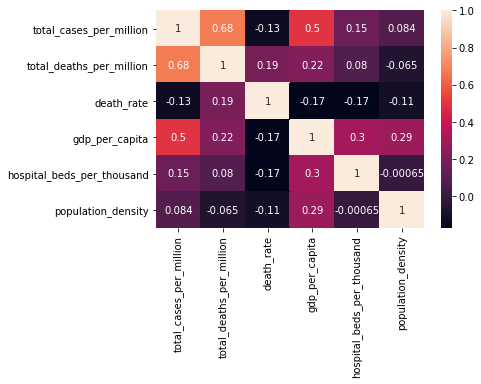

In [12]:
printCorrelationHeatmap()

In [13]:
printPearsonr()

Pearon method pearson corellation and p values respectively between total cases per Million gdp per capita, hospital beds per capita and population density respectively
(0.4979553653555061, 1.3875827660428626e-10)
(0.15198459021669591, 0.06611031525856406)
(0.0840278885646634, 0.3115965750310855)
Pearon method pearson corellation and p values respectively between total deaths per Million  gdp per capita, hospital beds per capita and population density respectively
(0.21580039946514354, 0.008662075358112468)
(0.07995603655429184, 0.33570713803553864)
(-0.06481119912690678, 0.435446053149733)
Pearon method pearson corellation and p values respectively between deathrate gdp per capita, hospital beds per capita and population density respectively
(-0.16699673059617953, 0.043211238502266866)
(-0.17069878985373108, 0.0387208081197544)
(-0.1108906941260577, 0.18118074767921125)


We observe that the p value between total deaths per million and gdp per capita is <0.01 that means the two indicators are correlated.
Regarding the death rate we also observe that there's correlation with gdp per capita and the hospital beds for capita.
The other indicators don't have low enough values to be correlated with each other.
We can therefore say that how wealthy a country is and how many available beds it has will have an effect on the number of people that will pass away from coronavirus.


Let's make that previous 3x3 graph plot a bit more clear using logarithmic scales for population density.

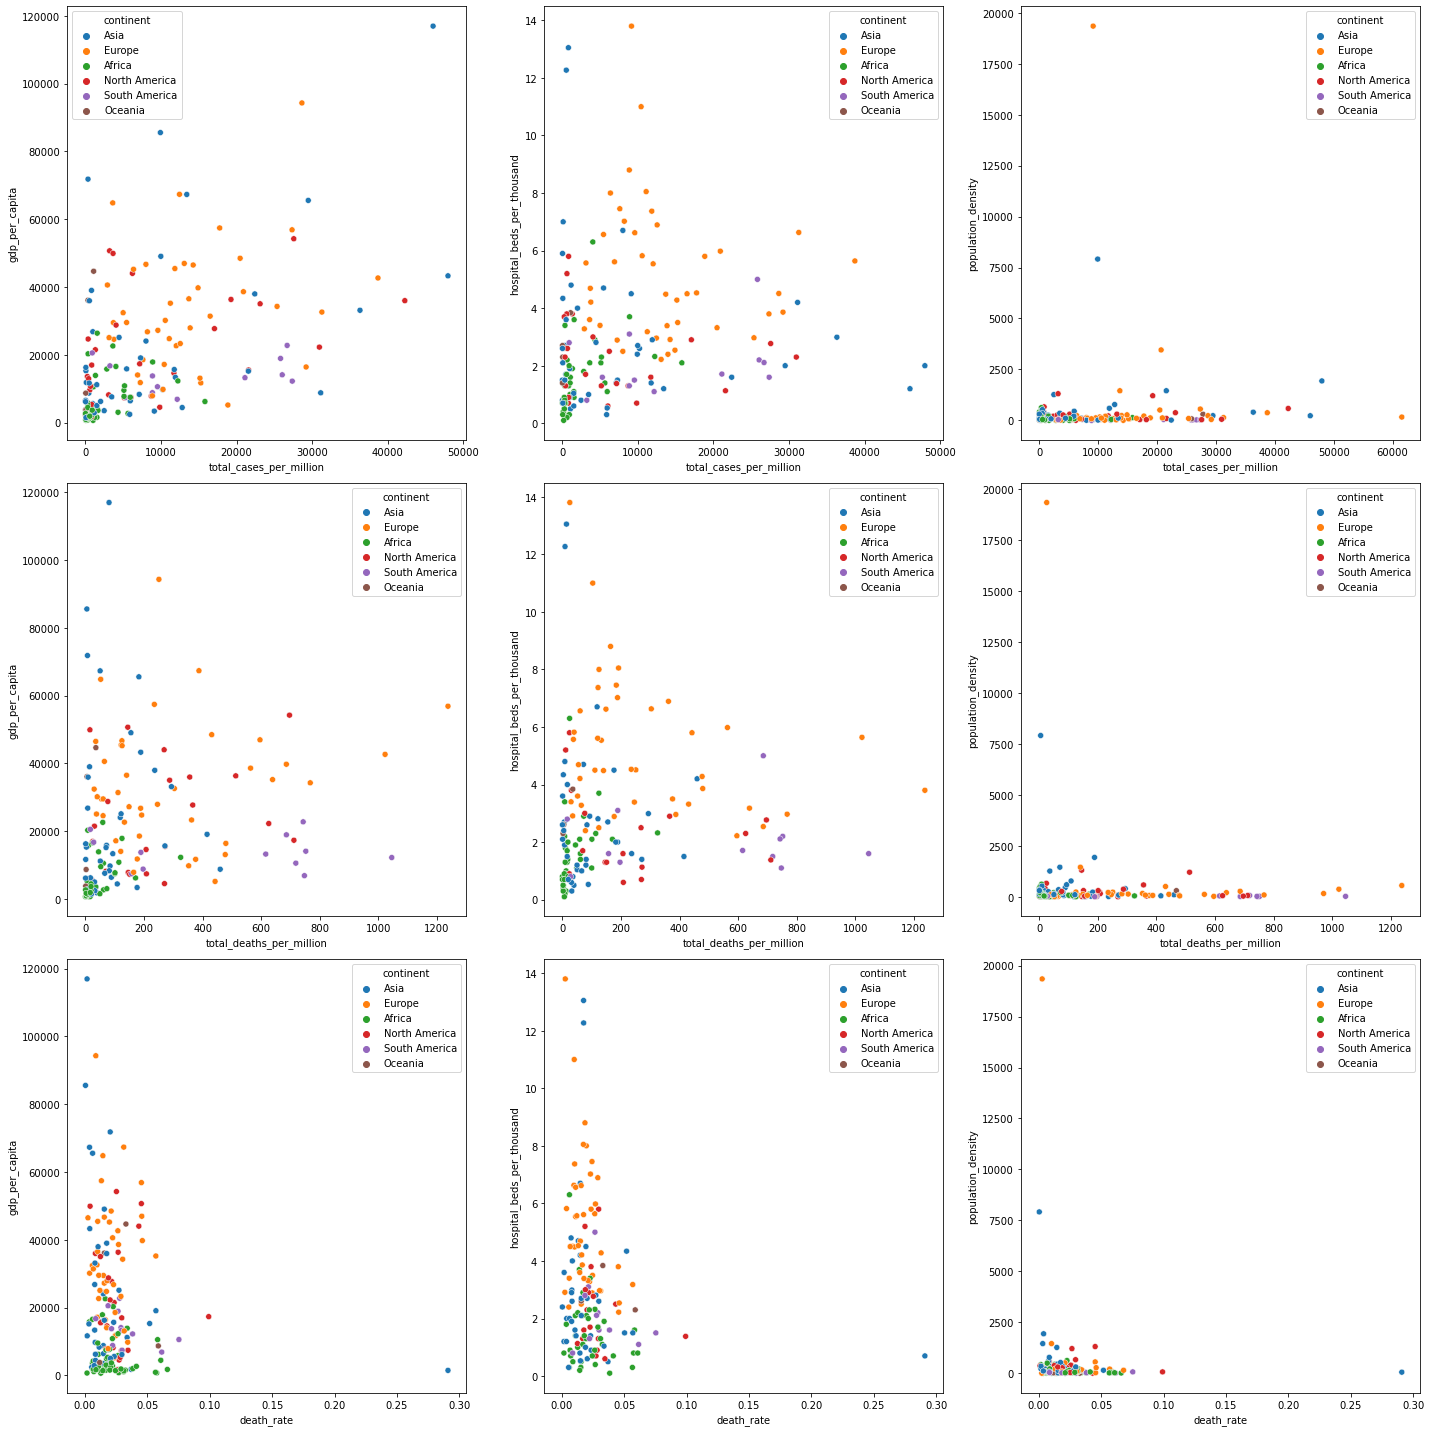

In [14]:
print9ScatterPlots('continent')

We can now observe that there's a corellation between total cases per million and population density. We observe a higher concentration of cases where population density is also high

Now we examine what happens when Africa is removed from the charts. Africa's numbers as reported are interesting to say the least, the death rate is low, although the lack of hospitals per bed. WHO believes that the low death rate is helped by higher volume of younger ages that is observed in most of the continent. https://www.bbc.com/news/world-africa-53181555

In [15]:
filteredDate.drop(filteredDate.loc[filteredDate['continent']=='Africa'].index, inplace=True)
display(filteredDate.head())


iso_code             location      continent       date  \
306       AFG          Afghanistan           Asia 2020-11-01   
568       ALB              Albania         Europe 2020-11-01   
1162      AND              Andorra         Europe 2020-11-01   
1655      AIA             Anguilla  North America 2020-11-01   
1906      ATG  Antigua and Barbuda  North America 2020-11-01   

      total_cases_per_million  total_deaths_per_million  total_cases  \
306                  1066.087                    39.457      41501.0   
568                  7253.805                   176.871      20875.0   
1162                61554.391                   970.685       4756.0   
1655                  199.973                       NaN          3.0   
1906                 1307.083                    30.635        128.0   

      total_deaths  gdp_per_capita  hospital_beds_per_thousand  \
306         1536.0        1803.987                        0.50   
568          509.0       11803.431                        2.89   
1162          75.0             NaN                         NaN   
1655           NaN             NaN                         NaN   
1906           3.0       21490.943                        3.80   

      population_density  death_rate  
306               54.422    0.037011  
568              104.871    0.024383  
1162             163.755    0.015770  
1655                 NaN         NaN  
1906             231.845    0.023438

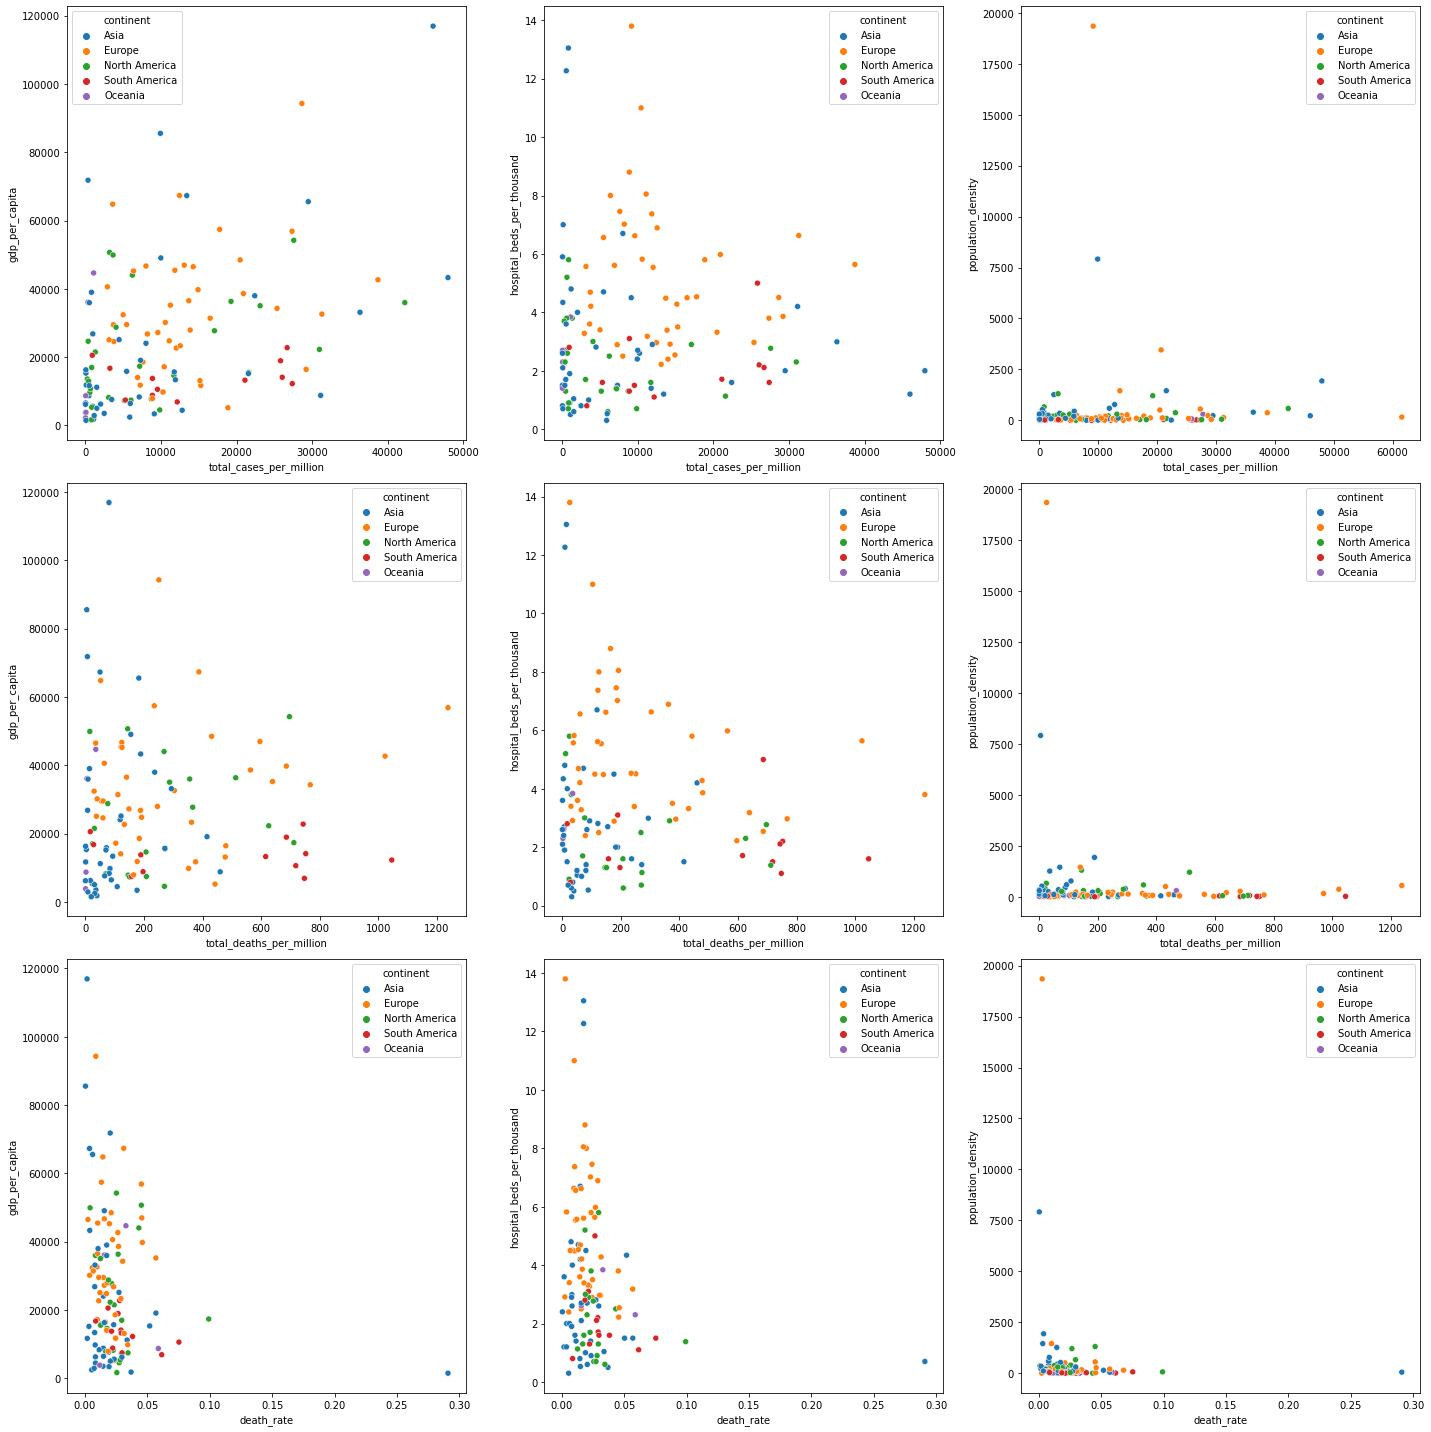

In [16]:
#sns.pairplot(filteredDate,hue="continent",kind='scatter',corner=True,dropna=True,diag_kind='kde')
#sns.pairplot(filteredDate,hue="continent",kind='scatter',x_vars=['total_cases_per_million','total_deaths_per_million','death_rate'],y_vars=["gdp_per_capita","hospital_beds_per_thousand","population_density"],corner=False,dropna=True,diag_kind='kde')
print9ScatterPlots('continent')

Again we can observe from the plots that countries with low GDP per capita saw higher death rate and higher deaths per million, a group of south American countries shows that.

total_cases_per_million  total_deaths_per_million  \
total_cases_per_million                    1.000000                  0.622306   
total_deaths_per_million                   0.622306                  1.000000   
death_rate                                -0.148295                  0.201510   
gdp_per_capita                             0.398024                  0.073404   
hospital_beds_per_thousand                -0.009340                 -0.066216   
population_density                         0.059015                 -0.100459   

                            death_rate  gdp_per_capita  \
total_cases_per_million      -0.148295        0.398024   
total_deaths_per_million      0.201510        0.073404   
death_rate                    1.000000       -0.207133   
gdp_per_capita               -0.207133        1.000000   
hospital_beds_per_thousand   -0.193304        0.150447   
population_density           -0.114570        0.280427   

                            hospital_beds_per_thousand  population_density  
total_cases_per_million                      -0.009340            0.059015  
total_deaths_per_million                     -0.066216           -0.100459  
death_rate                                   -0.193304           -0.114570  
gdp_per_capita                                0.150447            0.280427  
hospital_beds_per_thousand                    1.000000           -0.039465  
population_density                           -0.039465            1.000000

Pearon method pearson corellation and p values respectively between total cases per Million gdp per capita, hospital beds per capita and population density respectively
(0.39802442808437133, 1.6612666040601912e-05)
(-0.009339892330726567, 0.9228529002042223)
(0.059014805082109795, 0.5402625517571974)
Pearon method pearson corellation and p values respectively between total deaths per Million  gdp per capita, hospital beds per capita and population density respectively
(0.07340355057309317, 0.4460019330242842)
(-0.06621594630532579, 0.4918935838175944)
(-0.10045935858450848, 0.29637672247699764)
Pearon method pearson corellation and p values respectively between deathrate gdp per capita, hospital beds per capita and population density respectively
(-0.2071331103354214, 0.02991465666318088)
(-0.19330363407668133, 0.043036881692675895)
(-0.11457000928827726, 0.2333307586584496)


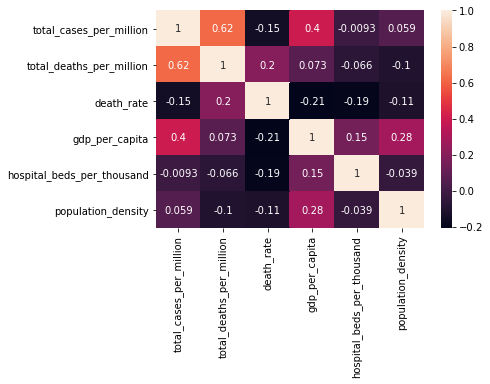

In [17]:
printCorrelationHeatmap()
printPearsonr()


Interestingly removing the data for african countries the pvalues change dramatically, the only pair of indicators that has a p value less than .05 is  total deaths per million - bed hopspitals per thousand which indicates as expected that better healthcare can reduce the volume of people that eventually die from the virus.

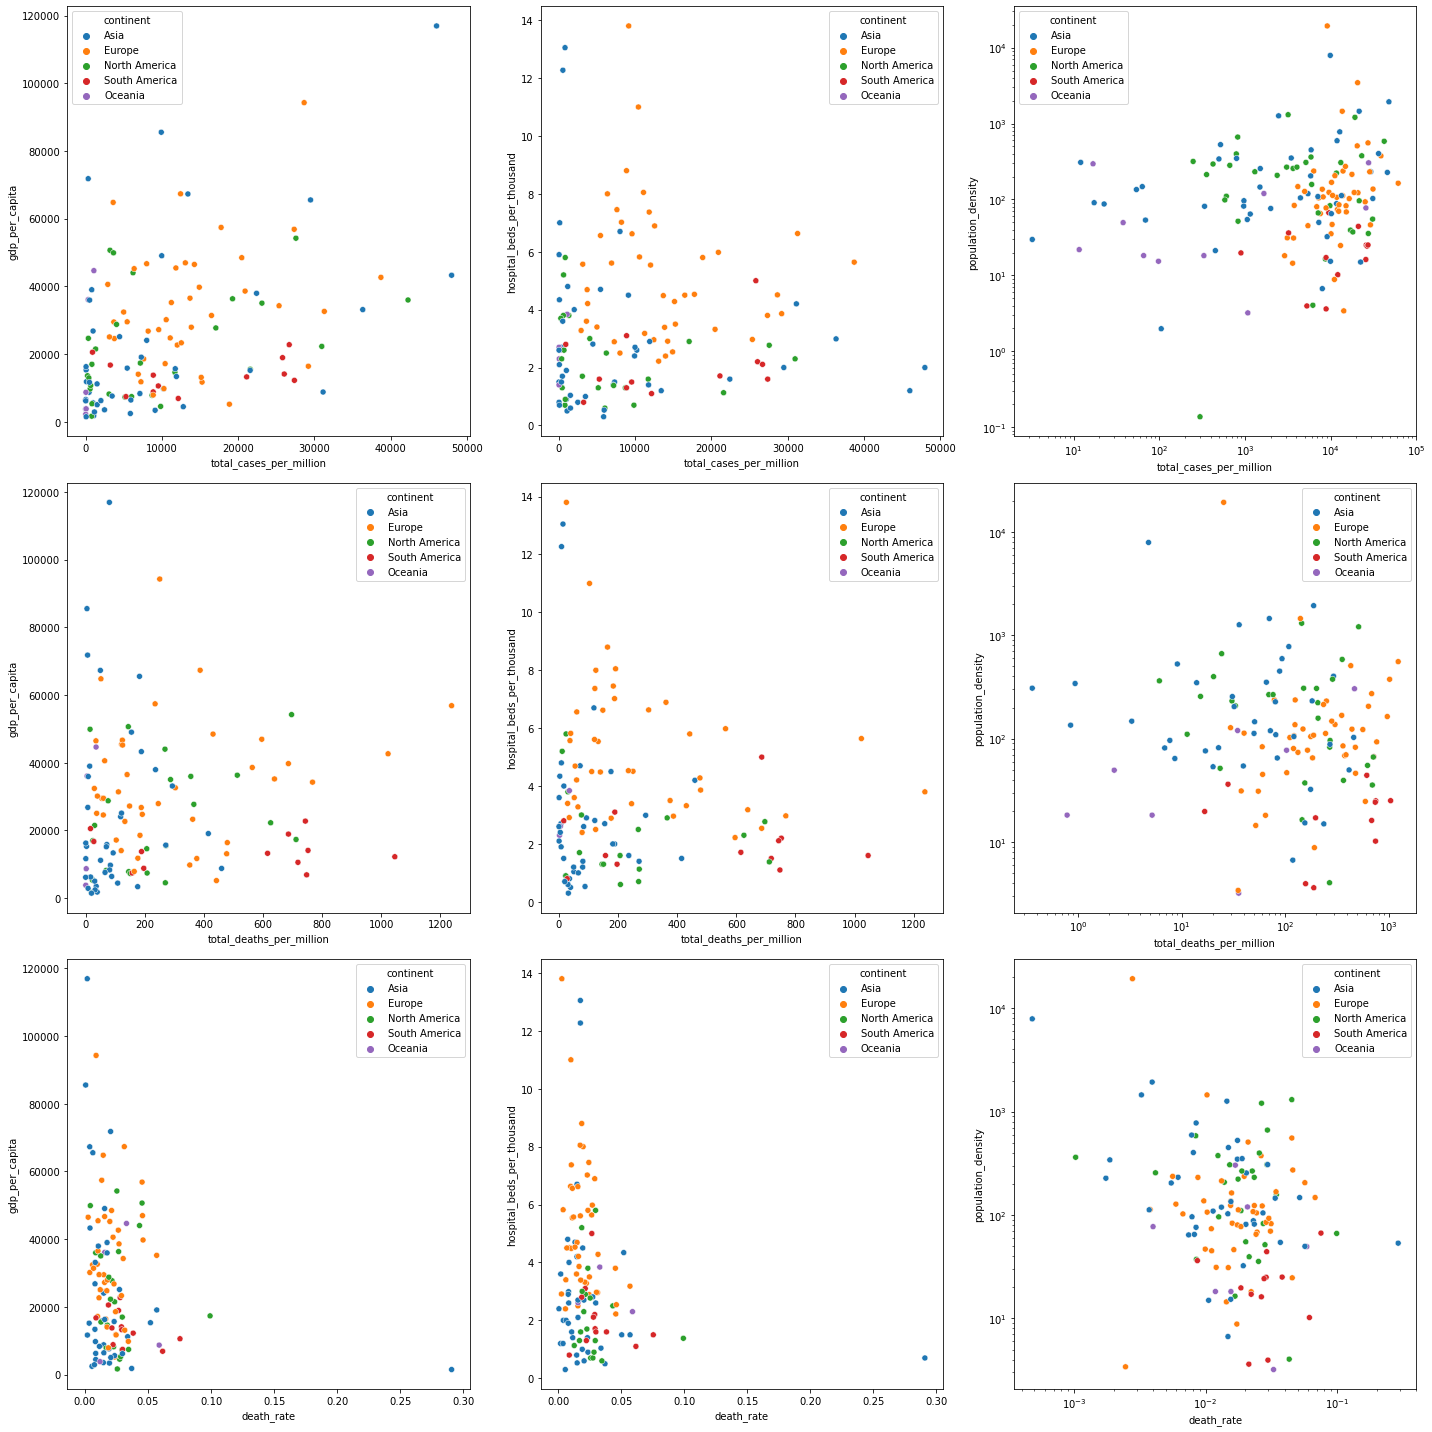

In [18]:
print9ScatterPlotsPopLoglog('continent')

Again here we observe the same corellation between the number of observed cases is analogous to population density of each country. 

We now move on to examamine exlusively the European countries

In [19]:
filteredDate.drop(filteredDate.loc[filteredDate['continent']!='Europe'].index, inplace=True)
display(filteredDate)

iso_code                location continent       date  \
568         ALB                 Albania    Europe 2020-11-01   
1162        AND                 Andorra    Europe 2020-11-01   
3418        AUT                 Austria    Europe 2020-11-01   
5185        BLR                 Belarus    Europe 2020-11-01   
5516        BEL                 Belgium    Europe 2020-11-01   
7283        BIH  Bosnia and Herzegovina    Europe 2020-11-01   
8618        BGR                Bulgaria    Europe 2020-11-01   
13219       HRV                 Croatia    Europe 2020-11-01   
13987       CYP                  Cyprus    Europe 2020-11-01   
14318       CZE          Czech Republic    Europe 2020-11-01   
14907       DNK                 Denmark    Europe 2020-11-01   
17488       EST                 Estonia    Europe 2020-11-01   
18011       FRO          Faeroe Islands    Europe 2020-11-01   
18879       FIN                 Finland    Europe 2020-11-01   
19210       FRA                  France    Europe 2020-11-01   
20634       DEU                 Germany    Europe 2020-11-01   
21142       GIB               Gibraltar    Europe 2020-11-01   
21473       GRC                  Greece    Europe 2020-11-01   
22758       GGY                Guernsey    Europe 2020-11-01   
24375       HUN                 Hungary    Europe 2020-11-01   
24706       ISL                 Iceland    Europe 2020-11-01   
26361       IRL                 Ireland    Europe 2020-11-01   
26611       IMN             Isle of Man    Europe 2020-11-01   
27273       ITA                   Italy    Europe 2020-11-01   
28113       JEY                  Jersey    Europe 2020-11-01   
29157  OWID_KOS                  Kosovo    Europe 2020-11-01   
30261       LVA                  Latvia    Europe 2020-11-01   
31569       LIE           Liechtenstein    Europe 2020-11-01   
31900       LTU               Lithuania    Europe 2020-11-01   
32231       LUX              Luxembourg    Europe 2020-11-01   
32562       MKD               Macedonia    Europe 2020-11-01   
34185       MLT                   Malta    Europe 2020-11-01   
35312       MDA                 Moldova    Europe 2020-11-01   
35643       MCO                  Monaco    Europe 2020-11-01   
36153       MNE              Montenegro    Europe 2020-11-01   
38111       NLD             Netherlands    Europe 2020-11-01   
40096       NOR                  Norway    Europe 2020-11-01   
42659       POL                  Poland    Europe 2020-11-01   
42933       PRT                Portugal    Europe 2020-11-01   
43838       ROU                 Romania    Europe 2020-11-01   
44169       RUS                  Russia    Europe 2020-11-01   
45510       SMR              San Marino    Europe 2020-11-01   
46556       SRB                  Serbia    Europe 2020-11-01   
47910       SVK                Slovakia    Europe 2020-11-01   
48181       SVN                Slovenia    Europe 2020-11-01   
49665       ESP                   Spain    Europe 2020-11-01   
51090       SWE                  Sweden    Europe 2020-11-01   
51420       CHE             Switzerland    Europe 2020-11-01   
54844       UKR                 Ukraine    Europe 2020-11-01   
55506       GBR          United Kingdom    Europe 2020-11-01   
56869       VAT                 Vatican    Europe 2020-11-01   

       total_cases_per_million  total_deaths_per_million  total_cases  \
568                   7253.805                   176.871      20875.0   
1162                 61554.391                   970.685       4756.0   
3418                 11834.251                   121.802     106584.0   
5185                 10422.125                   103.711      98482.0   
5516                 38716.382                  1022.812     448708.0   
7283                 15267.548                   376.126      50090.0   
8618                  7605.155                   184.070      52844.0   
13219                12012.858                   133.000      49316.0   
13987                

Note Sweden's death rate! Highest of all countries. Sweden compared to the rest of the countries didn't enforce any lockdowns or facemask rules since the beginning of the pandeminc.

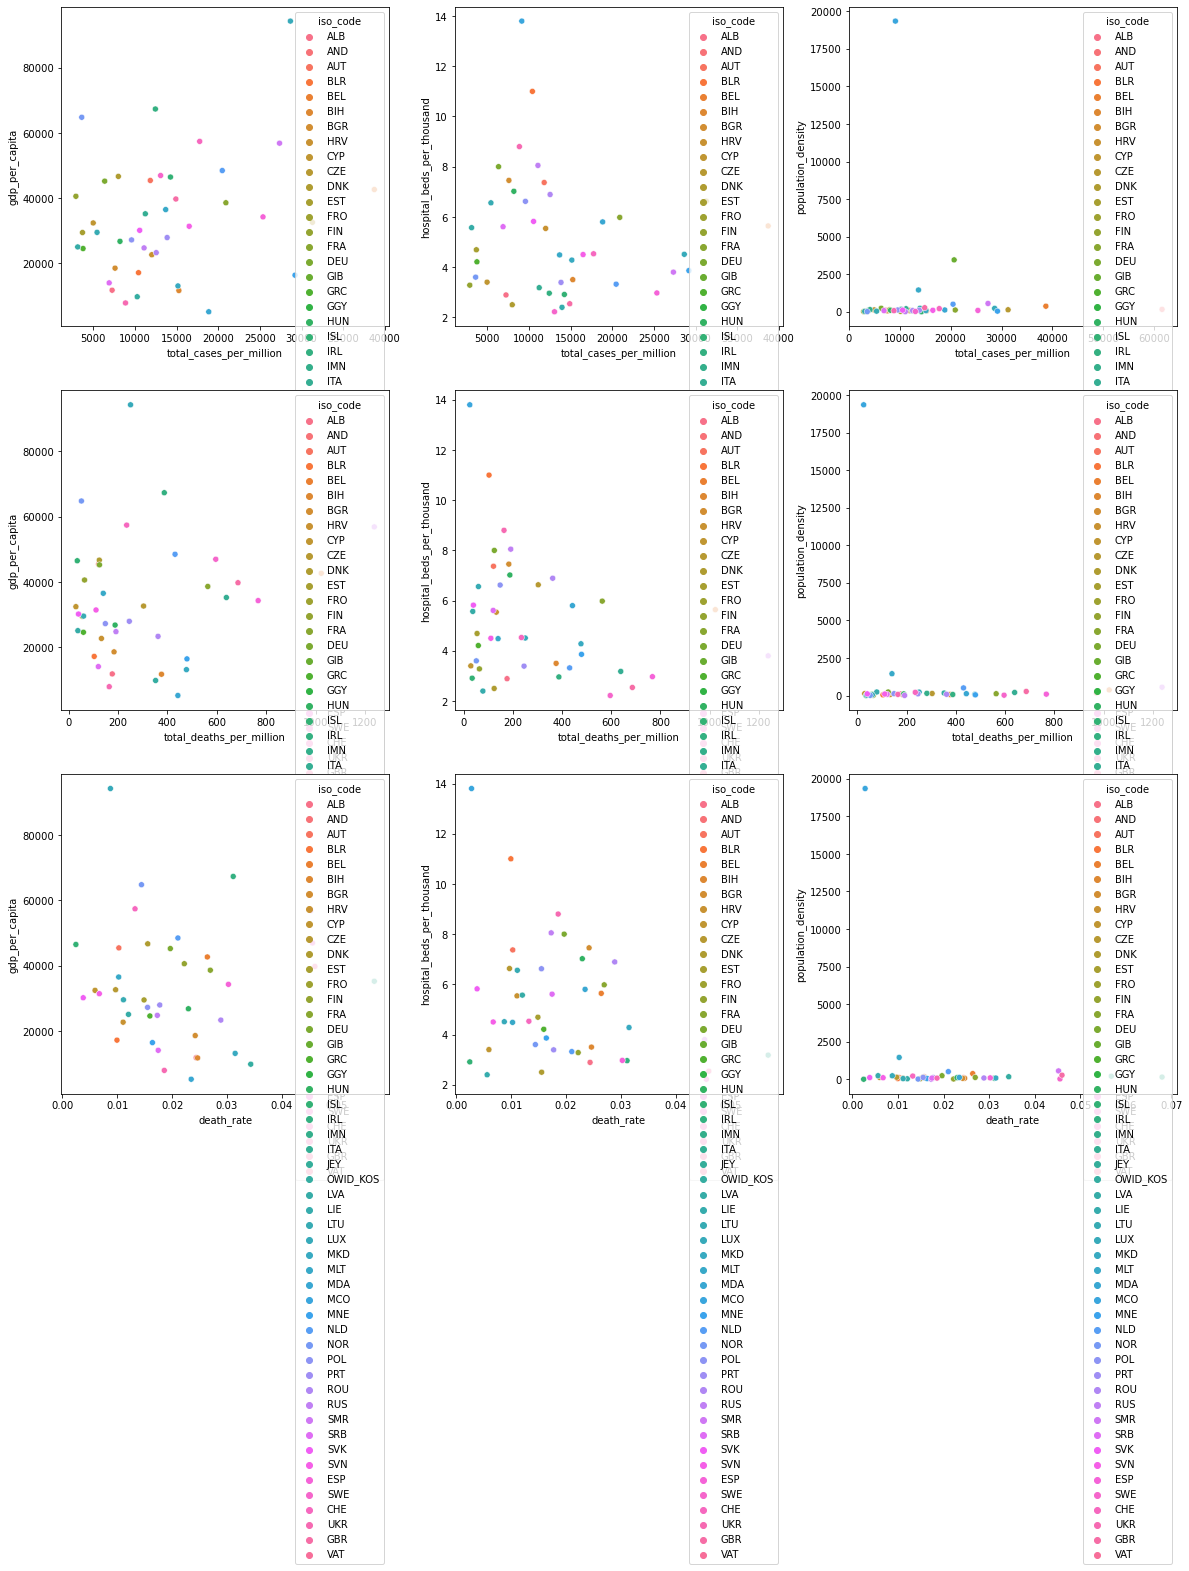

In [20]:
#sns.pairplot(filteredDate,hue="iso_code",kind='scatter',corner=True,dropna=True,diag_kind='kde')

print9ScatterPlots('iso_code')

Again it would appear a higher gdp per capita seems to translate to low deaths per million. Here population density doesn't seem to have an affect on any of the three indicators (death rate, cases per million, deaths per million)

Pearon method pearson corellation and p values respectively between total cases per Million gdp per capita, hospital beds per capita and population density respectively
(0.25042061258453757, 0.11429816798953907)
(-0.10505332176792703, 0.513318325641967)
(0.2645599980778979, 0.09461217211445695)
Pearon method pearson corellation and p values respectively between total deaths per Million  gdp per capita, hospital beds per capita and population density respectively
(0.1615865547141537, 0.3128240432800646)
(-0.2692555156956372, 0.08868815998476576)
(0.24145042983206472, 0.1283032871407327)
Pearon method pearson corellation and p values respectively between deathrate gdp per capita, hospital beds per capita and population density respectively
(0.02861919426935058, 0.8590203381577377)
(-0.31989993008584716, 0.04145609962528591)
(0.057954102965234025, 0.7189113959424028)


total_cases_per_million  total_deaths_per_million  \
total_cases_per_million                    1.000000                  0.710083   
total_deaths_per_million                   0.710083                  1.000000   
death_rate                                 0.164727                  0.749458   
gdp_per_capita                             0.250421                  0.161587   
hospital_beds_per_thousand                -0.105053                 -0.269256   
population_density                         0.264560                  0.241450   

                            death_rate  gdp_per_capita  \
total_cases_per_million       0.164727        0.250421   
total_deaths_per_million      0.749458        0.161587   
death_rate                    1.000000        0.028619   
gdp_per_capita                0.028619        1.000000   
hospital_beds_per_thousand   -0.319900       -0.342244   
population_density            0.057954        0.208220   

                            hospital_beds_per_thousand  population_density  
total_cases_per_million                      -0.105053            0.264560  
total_deaths_per_million                     -0.269256            0.241450  
death_rate                                   -0.319900            0.057954  
gdp_per_capita                               -0.342244            0.208220  
hospital_beds_per_thousand                    1.000000           -0.112701  
population_density                           -0.112701            1.000000

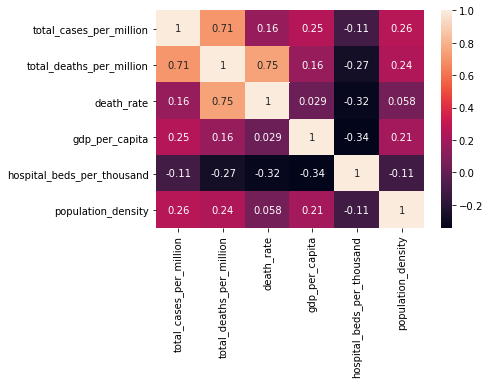

In [21]:
printPearsonr()
printCorrelationHeatmap()

Again the only indicator correlation that pass the p value thresshold is the death rate and hospital beds per capita, which makes logical sense.

In [22]:
filteredDate = df.loc[datemask]
filteredDate[['total_cases_per_million','total_deaths_per_million']]
filteredDate['death_rate'] = (filteredDate.total_deaths / filteredDate.total_cases)
filteredDate=filteredDate.loc[:,['continent','total_cases_per_million','total_deaths_per_million','death_rate']]
filteredDate.dropna()
countryGroups = filteredDate.groupby('continent')
gdf = filteredDate[['continent','total_cases_per_million','total_deaths_per_million','death_rate']].groupby('continent').mean()
gdf = gdf.reset_index()

display(gdf)

continent  total_cases_per_million  total_deaths_per_million  \
0         Africa              1922.303800                 32.968283   
1           Asia              8403.213739                 91.113293   
2         Europe             14302.399098                295.664958   
3  North America              8496.243333                213.936276   
4        Oceania              5185.545727                 92.829857   
5  South America             13815.439923                491.367083   

   death_rate  
0    0.022173  
1    0.023397  
2    0.022112  
3    0.025749  
4    0.022978  
5    0.032343

In [23]:
#g = sns.PairGrid(filteredDate,x_vars='continent',y_vars=['total_cases_per_million','total_deaths_per_million','death_rate'],size=5)
#g.map(sns.barplot)

continent  total_cases_per_million  total_deaths_per_million  \
0         Africa              1922.303800                 32.968283   
1           Asia              8403.213739                 91.113293   
2         Europe             14302.399098                295.664958   
3  North America              8496.243333                213.936276   
4        Oceania              5185.545727                 92.829857   
5  South America             13815.439923                491.367083   

   death_rate  
0    0.022173  
1    0.023397  
2    0.022112  
3    0.025749  
4    0.022978  
5    0.032343

<Figure size 432x288 with 0 Axes>

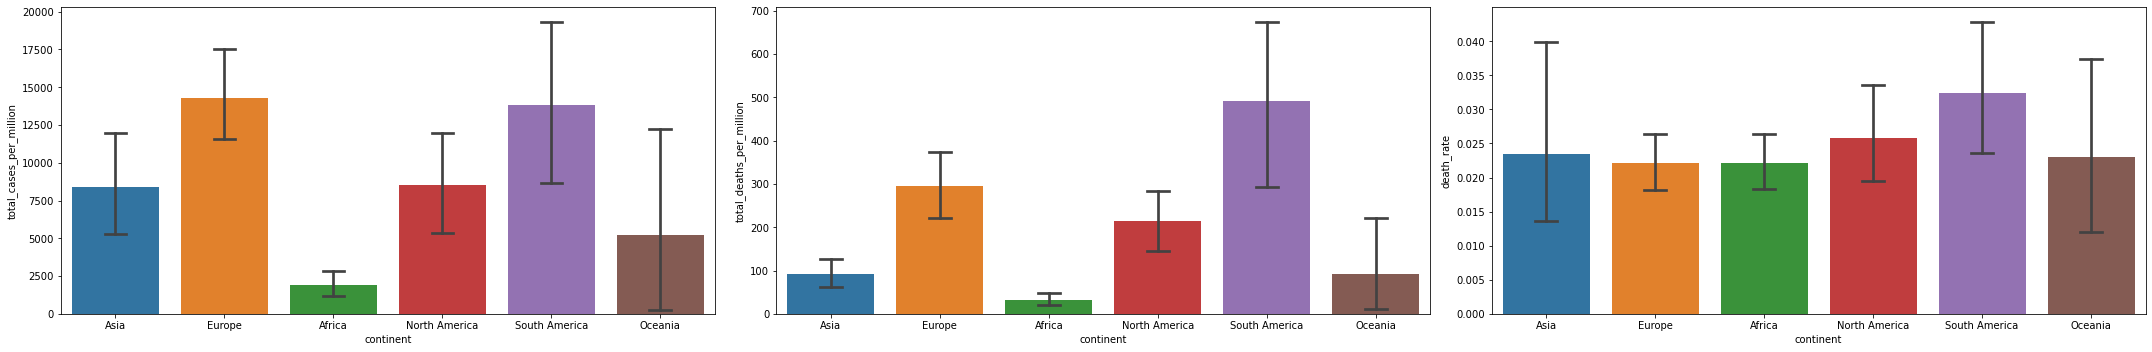

In [24]:
display(gdf)
printThreeBarPlots()

From the graphs it can be infered that Europe and South America saw the highest number of cases per million compared to the rest of the continents, with Africa coming in last. Despite the similar numbers between Europe and South America, the latter saw the highest by far total deaths per million and highest death rate. Europe seeing the second highest numers in total deaths per million. We could also say death rates are similar across all continents except South America. Asia showing similar numbers to North America in terms of caser per million but having less than half the deaths per million as North America is also interesting.

The graphs give us some idea on what seems to be similar but we can only deduce that after running the Student's T-Test. The hypothesis is that the mean the similarity between mean values for each continent has a statistical significance.

In [25]:
ContinentTtests()

T Test for  Africa and Asia between Death Rates Ttest_indResult(statistic=-0.16732779456179608, pvalue=0.8678265172262887)
T Test for  Africa and Asia between Deaths Per Million Ttest_indResult(statistic=-3.530195972165726, pvalue=0.0009048315036248281)
T Test for  Africa and Asia between Cases Per Million Ttest_indResult(statistic=-3.092507369941473, pvalue=0.003111275815818042)
T Test for  Africa and Europe between Death Rates Ttest_indResult(statistic=0.020188687298944085, pvalue=0.9839337950478333)
T Test for  Africa and Europe between Deaths Per Million Ttest_indResult(statistic=-7.900170423178298, pvalue=9.623319841880585e-11)
T Test for  Africa and Europe between Cases Per Million Ttest_indResult(statistic=-6.398940923412615, pvalue=5.120747622733947e-08)
T Test for  Africa and North America between Death Rates Ttest_indResult(statistic=-0.8314521342355154, pvalue=0.41002335399185275)
T Test for  Africa and North America between Deaths Per Million Ttest_indResult(statistic=-3.74

That make look like a lot of information to digest but here's the takeaway. 
The t tests show that Africa and Asia have 3.5 times dissimilar values regarding Deaths Per Million the pvalue being less than .001
Africa and Asia also have 3.0 times dissimilar values regarding Cases Per Million their pvalue being less than .05
Africa and North America are almost 4 times dissimilar regarding Deaths Per Million and their pvalue is less than 0.001
Africa and South America are also 4 and 4.5 times dissimilar regardng deaths per million and cases per million with also p values less than .001
Asia and South america have 4 times dissimilar Cases Per Million and the pvalue of equal .002
Europe and North America have 2.5 times dissimilar Europe and North America is with a p valuse less than .05
North America and South America have 2.5 times dissimilarity between Cases Per Million with a low p value 
Oceania Compared to South America has 2 and 3.3 times between Deaths Per Million and Cases Per Million with low p values 0.05 and .0039 

### The Observed similar death rates in the graph turn out to fail the t test with p values that are close to 1.0 that means there's no statistical significance comparing the death rates in diffierent continents, this means it's totally coincidental that the means Observed are similar

Now let's move on to analyse the data on a time basis 

In [26]:
def printThreeLinePlots(data_frame):
    plt.figure();
    fig, ax = plt.subplots(1, 3,figsize=(30,5))
    sns.lineplot(x='month',y='new_cases', data = data_frame,ax=ax[0]);
    sns.lineplot(x='month',y='new_deaths', data = data_frame,ax=ax[1]);
    sns.lineplot(x='month',y='death_rate', data = data_frame,ax = ax[2]);
    plt.tight_layout()

In [27]:
def get_month(row):
    return row.date.month 
def get_day(row):
    return row.date.day

df = pd.read_csv("owid-covid-data.csv")
df.drop(df.loc[df['date']=='2019-12-31'].index, inplace=True)
df = df.loc[:,['continent','date','new_cases','new_deaths']]
df['date'] = pd.to_datetime(df['date'])
#df['year'] = df['date'].dt.year
#df['month'] = df['date'].dt.month
#df['day'] = df['date'].dt.day
df['month'] = df.apply(get_month,axis=1)
perMonth = df.groupby('month')


In [28]:
df = pd.read_csv("owid-covid-data.csv")
df.drop(df.loc[df['date']=='2019-12-31'].index, inplace=True)
df = df.loc[:,['continent','date','new_cases','new_deaths']]
df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].dt.strftime('%Y%B%d')
df = df.set_index(pd.DatetimeIndex(df['date']))
#df['death_rate'] = df.new_deaths/df.new_cases
#display(df)
d = df.groupby(pd.Grouper(freq="D"))
sumPerDay= d.sum()
sumPerDay['death_rate'] = sumPerDay.new_deaths / sumPerDay.new_cases
sumPerDay.replace([np.inf], 0,inplace=True)
sumPerDay.fillna(value=0,inplace=True)
sumPerDay.reset_index(inplace=True)
sumPerDay['month'] = sumPerDay.apply(get_month,axis=1)

<Figure size 432x288 with 0 Axes>

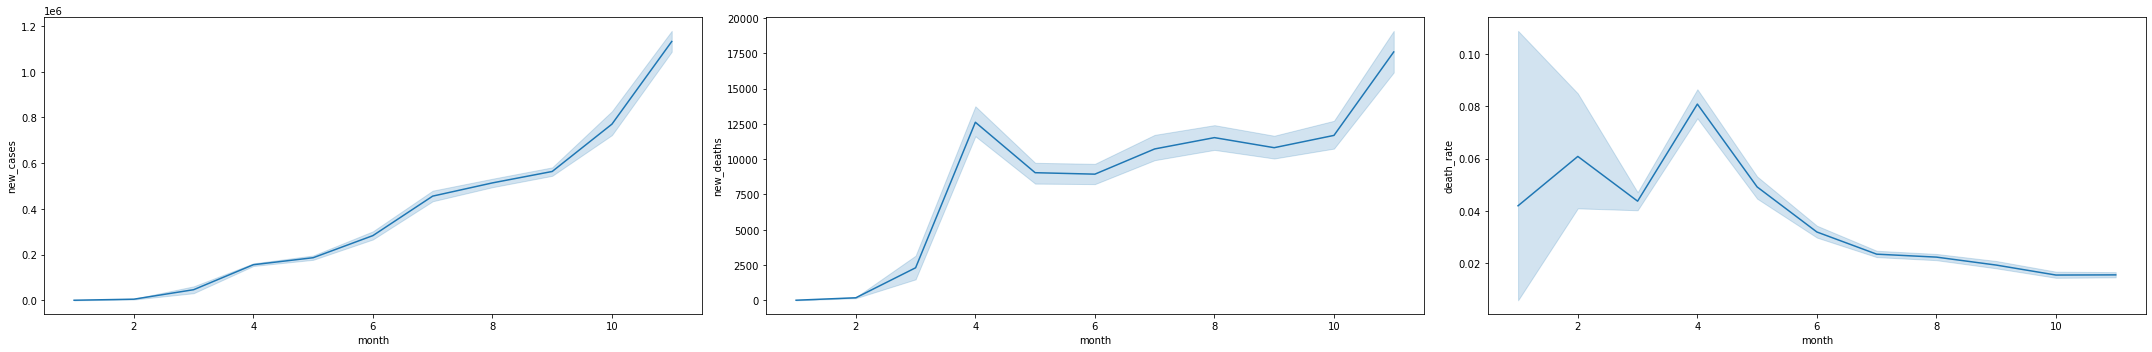

In [29]:
printThreeLinePlots(sumPerDay)


We can observe an almost exponential climb of the new cases per day in spite of lockdowns enforced in most areas of the world during April mid-May. The Death Rate started high at first but it's in decline and seems to be leveling off at 0.02

<Figure size 432x288 with 0 Axes>

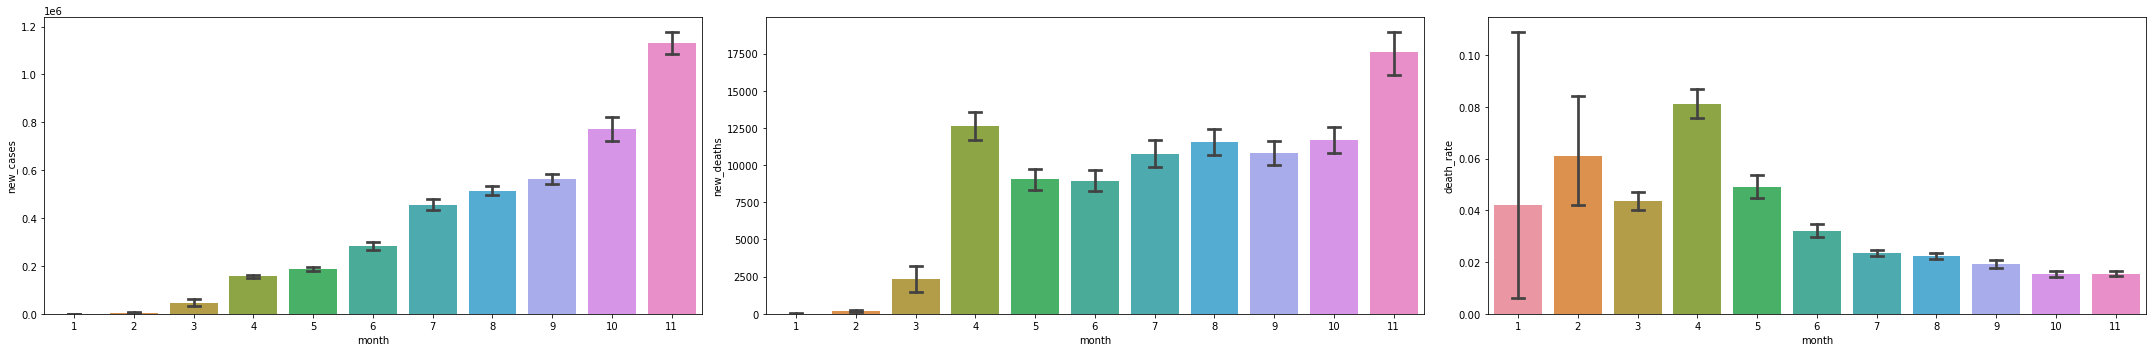

In [30]:
plt.figure();
fig, ax = plt.subplots(1, 3,figsize=(30,5))
sns.barplot(x='month',y='new_cases', data = sumPerDay,capsize=.2,ax=ax[0]);
sns.barplot(x='month',y='new_deaths', data = sumPerDay,capsize=.2,ax=ax[1]);
sns.barplot(x='month',y='death_rate', data = sumPerDay,capsize=.2,ax = ax[2]);
plt.tight_layout()

<AxesSubplot:xlabel='month', ylabel='new_cases'>

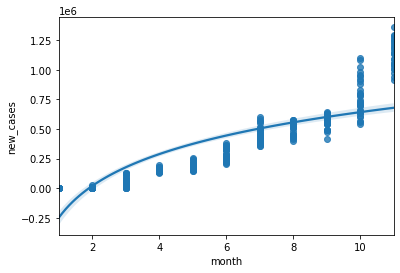

In [31]:
display(sns.regplot(x='month',y='new_cases',data = sumPerDay,logx=True))


We can see the new deaths don't follow the logarithmic scale in the last months that could be explained as a higher case rate

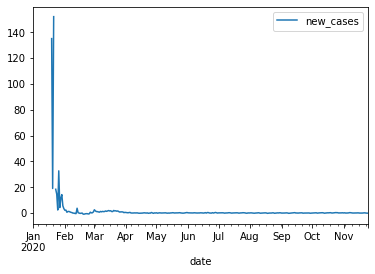

In [32]:
sumPerDay.set_index(pd.DatetimeIndex(sumPerDay['date']),inplace=True)
sumPerDay.drop(columns=['date','month'],inplace=True)
#display(sumPerDay)
changes = sumPerDay.pct_change(periods=6)
changes.new_cases.plot(label = 'new_cases')
_ = plt.legend(loc='best')



In [33]:
def printThreeLinePlotsContinents(data_frame):
    plt.figure();
    fig, ax = plt.subplots(1, 3,figsize=(30,5))
    sns.lineplot(x='month',y='new_cases', hue='continent', data = data_frame,ax=ax[0]);
    sns.lineplot(x='month',y='new_deaths',hue='continent', data = data_frame,ax=ax[1]);
    sns.lineplot(x='month',y='death_rate',hue='continent', data = data_frame,ax = ax[2]);
    plt.tight_layout()

In [34]:
df = pd.read_csv("owid-covid-data.csv")
df.drop(df.loc[df['date']=='2019-12-31'].index, inplace=True)
df = df.loc[:,['continent','date','new_cases','new_deaths']]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(pd.DatetimeIndex(df['date']))
#d = df.groupby(pd.Grouper(freq="D"))
continents = df.groupby(by =[df.continent,pd.Grouper(freq="D")])
perContinent = continents.sum()
perContinent['death_rate']=perContinent.new_deaths/perContinent.new_cases
perContinent.reset_index(level='date',inplace=True)
perContinent['month'] = perContinent.apply(get_month,axis=1)
#display(perContinent)


<Figure size 432x288 with 0 Axes>

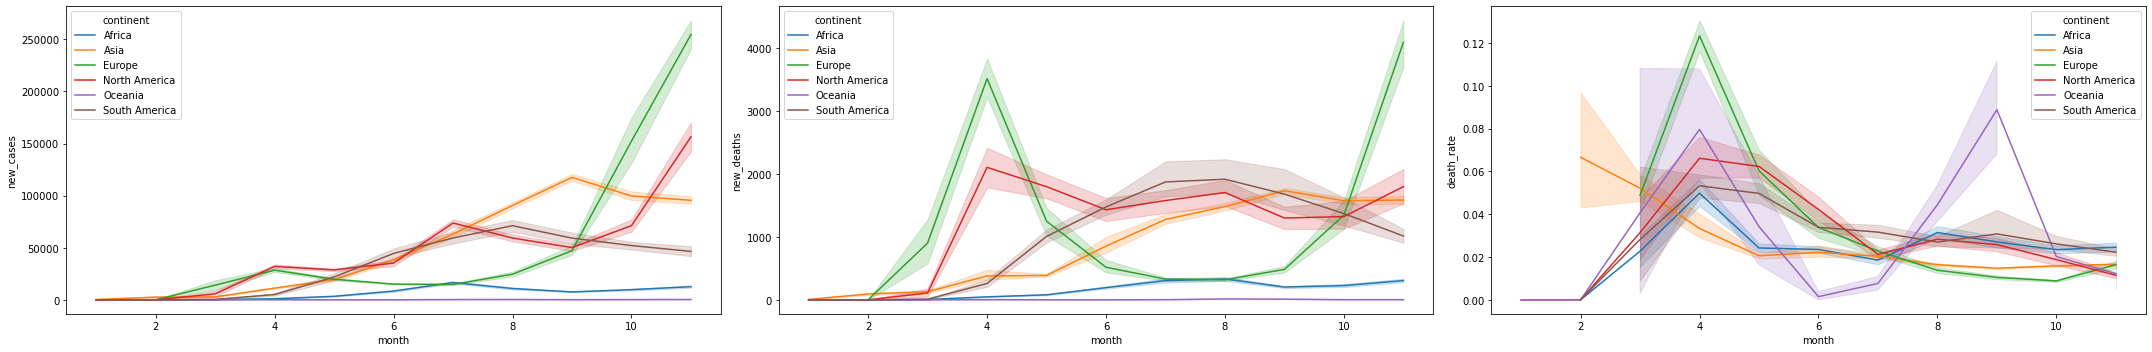

In [35]:
printThreeLinePlotsContinents(perContinent)

Observe the Green line for Europe and the Red Line for North America on the chart that has new_cases on the y axis. Both Continents went into strict lockdowns over the same periods of time in April-June which turned to some more relaxed restrictions until Late October Early November when most countries in Europe went into lockdown again. The lines from september onwards have a high gradient. Some countries and regions in South America went into lockdowns until mid Summer and the curve for the daily deaths seems to be descending. Some asian Countries chose to go into lockdowns early but that isn't representative in the rate new cases are reported. However it has to be said the rate has been slower than Europe and North America over all. Notice Oceania, these Island nations took action early on sealing their borders and have largely managed to weave off the crisis developed Continents saw

## Data from CDC and Analysis on corellation between COVID case rate and death rate and state vote preference
First the data is loaded,uncessesary columns that are not populated for some columns are dropped.
For the state of New York the data from NYC are added on it and then NYC is droppped from the frame.
State Voting Results are loaded and then merged (think of it as a SQL join on State) to get a complete dataframe will all the data needed in one place

In [36]:
cdc = pd.read_csv("united_states_covid19_cases_and_deaths_by_state.csv",skiprows=3)
cdc.drop(columns=['Confirmed Cases','Probable Cases','Confirmed Deaths','Probable Deaths'],inplace=True)
cdc.set_index('State/Territory',inplace=True)
cdc.head()
cdc.loc['New York'] += cdc.loc['New York City']
cdc.loc['New York']
cdc.drop('New York City')
votes = pd.read_excel('state-voting.xlsx')
#display(votes)
cdc = pd.merge(votes,cdc,right_index=True,left_on='State')
cdc.set_index('Abbreviation',inplace=True)
cdc.head()
#cdc.append(cdc.loc[['New York', 'New York City']].sum(), ignore_index=True)


State Vote  Total Cases  Cases in Last 7 Days  \
Abbreviation                                                       
AK                Alaska    R      28892.0                3983.0   
AL               Alabama    R     241957.0               16047.0   
AR              Arkansas    R     152625.0               12770.0   
AZ               Arizona    D     314326.0               27101.0   
CA            California    D    1158689.0               99422.0   

              Case Rate per 100000  Total Deaths  Deaths in Last 7 Days  \
Abbreviation                                                              
AK                          3918.0         118.0                   18.0   
AL                          4950.0        3572.0                  153.0   
AR                          5064.0        2436.0                  139.0   
AZ                          4383.0        6568.0                  184.0   
CA                          2929.0       18979.0                  513.0   

              Death Rate per 100000  Case Rate per 100000 in Last 7 Days  \
Abbreviation                                                               
AK                             16.0                                 77.2   
AL                             73.0                                 46.9   
AR                             80.0                                 60.5   
AZ                             91.0                                 54.0   
CA                             47.0                                 35.9   

              Death Rate per 100K in Last 7 Days  
Abbreviation                                      
AK                                           0.4  
AL                                           0.5  
AR                                           0.7  
AZ                                           0.4  
CA                                           0.2

I want to determine how the Per 100k Rates of Cases / Deaths are visualised on a scatter plot. Note that Red maps to a Republican state and Blue maps to Democrat a state

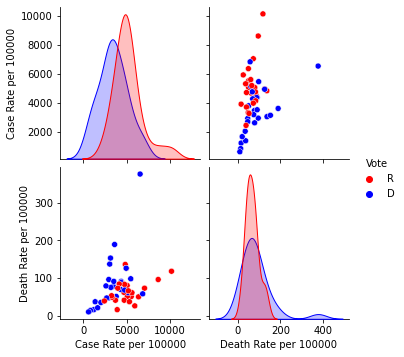

In [37]:
colors =["#ff0000","#0000ff"]
sns.pairplot(cdc, hue='Vote',hue_order=['R','D'],palette=colors,vars=['Case Rate per 100000','Death Rate per 100000'])

We can see that the data are concentrated in the same area except for a few outliers we have to perform statistical analysis to get some numeric results.
First of all lets group the data by Vote. Then will run t-test

In [38]:
voteGroups=cdc.groupby('Vote')
gcdc = cdc[['Vote','Case Rate per 100000','Death Rate per 100000']].groupby('Vote').mean()
display(gcdc)

Case Rate per 100000  Death Rate per 100000
Vote                                             
D              3447.038462              85.076923
R              5130.720000              66.840000

Interestingly we observe a higher case rate for Republican States, but a higher Death Rate for Democrat States. 
The t-test below will determine whether there's something of statistical significance to be concluded.

In [39]:

R_dr = voteGroups.get_group('R')['Death Rate per 100000']
R_cr = voteGroups.get_group('R')['Case Rate per 100000']
D_dr = voteGroups.get_group('D')['Death Rate per 100000']
D_cr = voteGroups.get_group('D')['Case Rate per 100000']

print('T-test between Republican Death Rate and Democrat Death Rate per 100k ' , stats.ttest_ind(R_dr,D_dr, equal_var = False))
print('T-test between Republican Case Rate and Democrat Case Rate perk 100k '  ,stats.ttest_ind(R_cr,D_cr,equal_var = False))

T-test between Republican Death Rate and Democrat Death Rate per 100k  Ttest_indResult(statistic=-1.1674386902871081, pvalue=0.25131331864751627)
T-test between Republican Case Rate and Democrat Case Rate perk 100k  Ttest_indResult(statistic=3.6819871089076206, pvalue=0.0005778214559186343)


Observe that in the case of Death Rates per 100k the p value > 0.05 so there's no statistical significance between the vote preference of the state compared to the death rate that has been logged for that state.
However on the Case Rates per 100k the p value is <<0.05 so there's a statistical significance. So there is a linkage between what a state voted and the Case Ratio logged.

Let's now compute the standard error of the mean of each group

In [40]:
print('Rebublican death ratio per 100k standard error',R_dr.sem())
print('Republican case ration per 100k standard error',R_cr.sem())
print('Democrat death ratio per 100k standard error',D_dr.sem())
print('Democrat case ration per 100k standard error',D_cr.sem())

Rebublican death ratio per 100k standard error 5.995464952778892
Republican case ration per 100k standard error 327.98875753090476
Democrat death ratio per 100k standard error 14.42497013215658
Democrat case ration per 100k standard error 318.628341396098


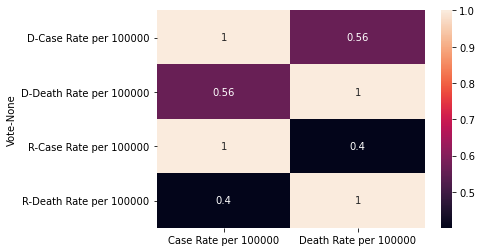

In [41]:
_ = sns.heatmap(voteGroups['Case Rate per 100000','Death Rate per 100000'].corr(), annot=True)